In [1]:
from typing_extensions import TypedDict
from langgraph.graph.state import StateGraph, START

class State(TypedDict):
    foo: str

# Subgraph
def subgraph_node_1(state: State):
    return {"foo": "hi! " + state["foo"]}

subgraph_builder = StateGraph(State)
subgraph_builder.add_node(subgraph_node_1)
subgraph_builder.add_edge(START, "subgraph_node_1")
subgraph = subgraph_builder.compile()

# Parent graph
builder = StateGraph(State)
builder.add_node("node_1", subgraph)
builder.add_edge(START, "node_1")
graph = builder.compile()

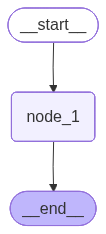

In [3]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

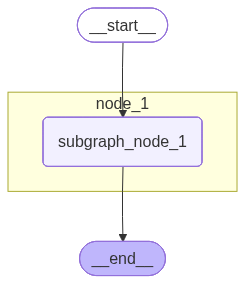

In [2]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    pass

In [5]:
# Define parent graph
class ParentState(TypedDict):
    foo: str

def node_1(state: ParentState):
    return {"foo": "hi! " + state["foo"]}

builder = StateGraph(ParentState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", subgraph)
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
graph = builder.compile()

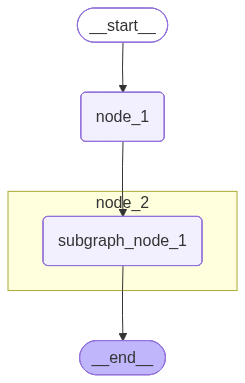

In [6]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    pass

In [7]:
for chunk in graph.stream({"foo": "foo"}):
    print(chunk)

{'node_1': {'foo': 'hi! foo'}}
{'node_2': {'foo': 'hi! hi! foo'}}
